# eSports Over the Years - An Analysis of Video Game "Success" in eSports by Genre
by Abbas Syed
<br>
Student #: 100973637

---

## Introduction
A "sport" has traditionally been defined as any competitive-based activity involving physical, full-body movement. However, since the invention of the computer and later, video games, the term has slowly been 'widening' to accommodate other forms of competitive play. Gradually, as more competitive-style video games released (such as shooters, battle arenas, etc.), more people around the world started to realize their skills in these games and like-minded players begun hosting tournaments together. Communities formed, tournaments got bigger, groups and organizations dedicated to these tournaments were founded; this all accumulated to the eSports industry that it is today.
<br>
<br>
Despite the rapid growth it has seen since the beginning, the eSports industry is still relatively very young, where there still does not exist proper standardized regulations, administration, or a sole governing body. National governments also have varied involvement in supervising eSports tournaments and the like; in general, it is very inconsistent. This has caused concerns over the integrity of the industry and its future, with people questioning the credibility of finding a career or investing in eSports, and even whether or not any part of the eSports market is profitable. Numerous forms of research/media have analyzed the industry and discussed what eSports needs to be sustainable, and in this report, the question that is looking to be answered is: **"which genre or genres of video game see the most success in eSports?"**
<br>
<br>
Video game genre is fundamental to the eSport treatment a game may receive in its lifetime. Recall that sports are by definition competitive—this requires the video game as well to at least include some sort of competitive aspect, in which players can compete for things like a higher score, faster elapsed time, more wins, etc. The genre of video game defines what kind of gameplay style is to be expected, and thus tells us whether or not the game is naturally competitive.
<br>
Common, generally non-competitive video game genres include:

- Adventure
- Interactive/Visual Novel
- Simulators
- Sandbox
- Open-world Exploration
- Horror/Survival
- Platformer

This is not an exhaustive list and each general genre contains its own specific sub-genres, however, it is not relevant to this report. Instead, we are concerned with the competitively-driven genres of video games. Based on the dataset used, the following list shows all of the video game genres that have seen activity in eSports:

- Strategy
- First-Person Shooter (FPS)
- Multiplayer Online Battle Arena (MOBA)
- Role-Playing Game (RPG)
- Fighting Game
- Racing
- Sports
- Collectible Card Game (sometimes referred to as "Trading Card Game" or "TCG")
- Puzzle Game
- Battle Royale
- Third-Person Shooter
- Music/Rhythm Game

The dataset is taken from [Kaggle.com](https://www.kaggle.com/datasets/rankirsh/esports-earnings/data), and is authored by Ran Kirshenboim, who mentions that the dataset sources from [EsportEarnings.com](https://www.esportsearnings.com/). Along with the video game name, it contains each game's release year, genre, total earnings (including offline and % of earnings offline), total players, and total number of tournaments (all within 1998 to 2023).

## Analyses
The CSV dataset will be analyzed using Pandas, Scikit-Learn, Matplotlib's PyPlot module and Seaborn. The packages have been installed into the project folder using Pip, within a virtual environment so as to remain local to the project. iPyKernel was also installed to use as the local Python kernel for Jupyter. First, let's import the mentioned packages as well as our CSV data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# makes number formatting/displaying consistent (every float value will be rounded to 2 decimal places)
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

full_table = pd.read_csv("GeneralEsportData.csv")
full_table.head()

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,736284.75,522378.17,0.71,624,341
1,Age of Empires II,1999,Strategy,3898508.73,1361409.22,0.35,2256,1939
2,Age of Empires III,2005,Strategy,122256.72,44472.60,0.36,172,179
3,Age of Empires IV,2021,Strategy,1190813.44,439117.93,0.37,643,423
4,Age of Empires Online,2011,Strategy,11462.98,775.00,0.07,52,68


Here is a preview of the first 5 entries in the CSV table. The "Game", "ReleaseDate", and "Genre" are self-explanatory/have already been explained. Notice how different releases or iterations of games are treated as their own separate game. Sometimes this can be due to new features, implementations, fixes and more that the developers have added to the game (e.g. Blizzard Entertainment's Overwatch and Overwatch 2), other times it is because the next installation focuses on a different aspect from the previous game entirely, while maintaining the same gameplay features.

"TotalEarnings" depicts the total amount of earnings, in USD, that have been given out to players and teams for its respective game.
<br>
"OfflineEarnings" depicts the amount of earnings that were given out in "offline" tournaments, meaning only tournaments that were held in-person (sometimes called LAN tournaments, where LAN is short for local area network) and not online via servers.
<br>
"PercentOffline" depicts the percent as a decimal value of OfflineEarnings out of TotalEarnings, rounded to 6 decimal places.
<br>
"TotalPlayers" depicts not the entire playerbase but the total amount of players that participated in tournaments for the respective game.
<br>
"TotalTournaments" depicts the total amount of tournaments that were held for the respective game, both offline and online.

Next, some pre-processing and cleaning will be performed using Pandas to ready the data for proper analysis.

In [2]:
print(full_table.shape)

(669, 8)


`full_table.shape` returns a simple tuple that shows the number of entries (rows) in the table, and the number of value categories (columns). Keep in mind that the data frame already considers the top row to be labels and only returns the number of rows with actual data. So, the original dataset has 669 entries.

In [3]:
full_table.drop_duplicates()                                    # Removing any unneseccary duplicate entries
print(full_table[full_table["TotalTournaments"] == 0].shape)    # Prints a tuple in the form (# of rows with "TotalTournaments" = 0, # of columns)
print(full_table[full_table["TotalTournaments"] != 0].shape)    # Prints (# of rows with "TotalTournaments" != 0, # of columns)
full_table = full_table[full_table["TotalTournaments"] != 0]

(48, 8)
(621, 8)


Start with removing duplicate entries, to avoid skewed analytical data. The following two `print()` statements are similar to the previous one: the first shows the number of entries that have a value of 0 under "TotalTournaments", which is 48, and the second shows entries that have a *non-zero* value under "TotalTournaments", which is 621. Since our analysis is only concerned with games that have had eSport activity (meaning tournaments were held), we can remove the entries with values of 0 for "TotalTournaments"; this was done in the last line. We can verify that the able no longer has these values by the following code:

In [4]:
print((full_table["TotalTournaments"] == 0).any())  # Prints a check if any entries with "TotalTournaments" == 0 exist; True if at least one exists, False if none exist

False


To allow for more compact visualization, we will shorten the genre names by their respective abbreviations, or removing some unneseccary words.
<br>
- "First-Person Shooter" to "FPS"
- "Multiplayer Online Battle Arena" to "MOBA"
- "Role-Playing Game" to "RPG"
- "Fighting Game" to "Fighting"
- "Collectible Card Game" to "CCG"
- "Puzzle Game" to "Puzzle"
- "Battle Royale" to "BR"
- "Third-Person Shooter" to "TPS"
- "Music / Rhythm Game" to "Rhythm"

"Strategy", "Racing", and "Sports" do not need to be changed.

In [5]:
full_table["Genre"] = full_table["Genre"].replace({     # replaces each "Genre" value with the following shortened value, all at once
    "First-Person Shooter": "FPS",
    "Multiplayer Online Battle Arena": "MOBA",
    "Role-Playing Game": "RPG",
    "Fighting Game": "Fighting",
    "Collectible Card Game": "CCG",
    "Puzzle Game": "Puzzle",
    "Battle Royale": "BR",
    "Third-Person Shooter": "TPS",
    "Music / Rhythm Game": "Rhythm"
})

full_table["Genre"].unique()                            # Print all of the unique values under the "Genre" column to verify they have changed

array(['Strategy', 'FPS', 'MOBA', 'RPG', 'Fighting', 'Racing', 'Sports',
       'CCG', 'Puzzle', 'BR', 'TPS', 'Rhythm'], dtype=object)

Now that the dataframe is ready, we can begin calculations. Because of the nature of the data, it is not suitable to find the mean, median, standard deviation, etc.... of all of the columns how they are right now; it will end up heavily skewed.

To combat this, the approach we will take moving forward will involve *clustering data* into "tiers". By standardizing the data and grouping it into clusters (with the help of k-means), we will get a more consistent view of where each genre stands. So, we can define a genre to be "successful" if it lies in the top-tier cluster. We will sort the data into 4 different clusters/tiers, Tier 1 being succesful eSport activity, Tier 2 and 3 being moderate-yet-unsustainable activity, and Tier 4 being unsuccessful activity.

After previous analysis tests, we found the clustered model was still extremely skewed in favour of one certain tier (614 out of 621 entries were in a single cluster). To balance this out even more, new columns were added which listed out the log transformations for each column of interest. Using NumPy's method, the following log transformation formula was applied:
$$ \log(1 + x) $$
where $ x $ is the original value. This compressed extremely large values to help reduce outliers and high deviation. 

In [6]:
# adding columns that calculate log(1 + x) for each metric
full_table["LogEarnings"] = np.log1p(full_table["TotalEarnings"])
full_table["LogPlayers"] = np.log1p(full_table["TotalPlayers"])
full_table["LogTotalTournaments"] = np.log1p(full_table["TotalTournaments"])

log_metrics = [
    'LogEarnings',
    'LogPlayers',
    'LogTotalTournaments'
]

# normalize the data
scaler = StandardScaler()                           # what we will use to apply the standardization formula
X = scaler.fit_transform(full_table[log_metrics])   # fits and transforms the metrics both at once

kmeans = KMeans(n_clusters=4, random_state=42)      # our k-means model object. random_state is a seed for a random generator and can be any fixed value to ensure reproducibility
full_table["Cluster"] = kmeans.fit_predict(X) + 1   # adding a new column to the table that places each entry into a cluster (range of 1,2,3,4, inclusive)

A lot of processing happened in this cell. First we normalized the logarithm-scaled values for our columns of interest, "TotalEarnings", "TotalPlayers", and "TotalTournaments" (these are essentially our metrics for defining how to cluster the data). The standardization formula for a distribution is
$$ z = {x - \mu \over \sigma} $$
where $ z $ is the scaled/standardized value of the feature, $ x $ is the original value, and $ \mu $ & $ \sigma $ are the mean and standard deviation of the feature's column, respectively. `scaler = StandardScaler()` tells the script to use this formula when normalizing the data. When `scaler.fit_transform()` is called on the columns of interest, it both calculates the $ \mu $ and $ \sigma $ of each feature ("fits"), and then standardizes it by applying the formula ("transforms"). `X` is the NumPy N-dimensional array object that stores all of this processed data for us.

In the last two lines, we first create the k-means model as an object using Scikit's `KMeans()` method. Since there are 4 different tiers, the number of clusters was set to 4. `random_state` is a seed for randomness and can basically be any value as long as it is fixed. Finally, we assign each entry in `X` to a cluster by running the k-means algorithm using our model with `kmeans.fit_preict(X)`. In the same line, this is added as a new column to the original table with the name "Cluster"; an offset of `+ 1` is there to align with the potential Tier level the game will be at.

In [ ]:
counts = full_table["Cluster"].value_counts().reset_index()
counts.columns = ["Cluster", "Count"]
counts = counts.sort_values(by='Cluster', ascending=True).reset_index(drop=True)

counts

,Cluster,Count
0,1,194
1,2,178
2,3,120
3,4,129


In [ ]:
tier_summary = full_table.groupby('Cluster')[[ # a single-key grouping pattern by Cluster, applying mean to each column
    'TotalEarnings',
    'TotalPlayers',
    'TotalTournaments'
]].mean()

tier_summary

,TotalEarnings,TotalPlayers,TotalTournaments
Cluster,,,
1,415645.64,80.27,24.03
2,59686.09,12.34,3.52
3,15005421.10,1227.78,512.33
4,444.27,6.03,2.27


The above cells output some information about the table via the clusters. By the `counts` dataframe, it seems there is a good spread of titles across all four clusters. By the `tier_summary` dataframe, we can define which cluster accounts for which eSport Tier. Clearly, cluster 3 seems to be Tier 1 based on how vastly larger every value is compared to the rest of the clusters. Then, cluster 1 would be Tier 2, cluster 2 would be Tier 3, and cluster 4 would be Tier 4. We can add a new column indicating each title's Tier based on what cluster it is in.

In [15]:
mapping = { # define which cluster maps to which Tier
    3: 1,
    1: 2,
    2: 3,
    4: 4
}

full_table["Tier"] = full_table["Cluster"].map(mapping)

Another aspect of interest is which genres of games make up each tier. Using a multi-key grouping pattern, we can output the count of each genre in each Tier.

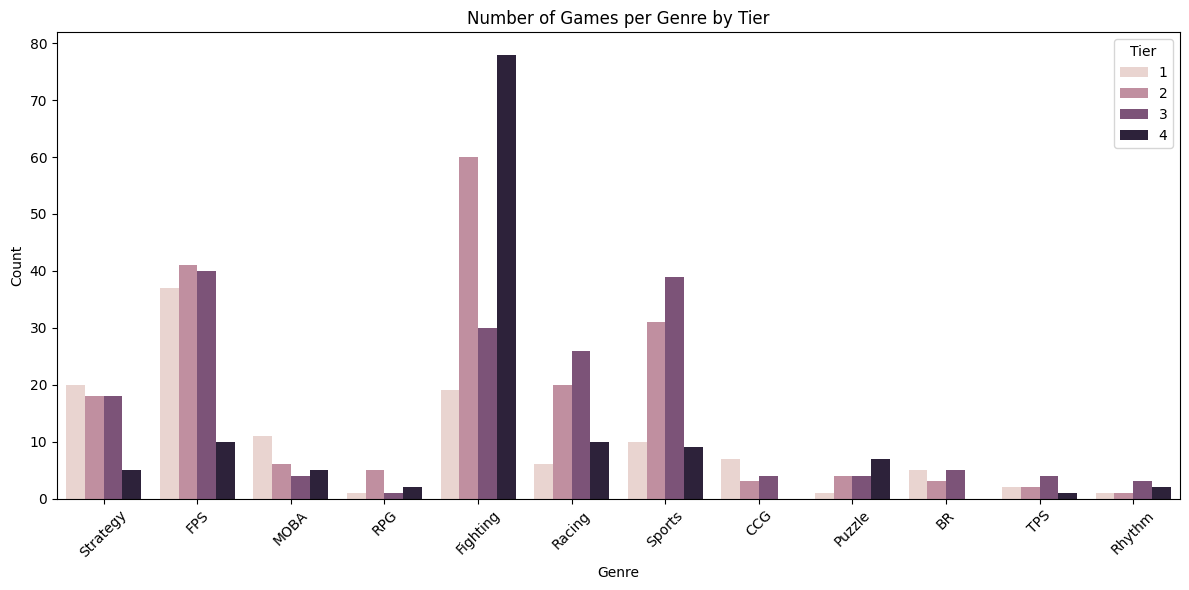

In [ ]:
genre_tier_counts = full_table.groupby(['Genre', 'Tier']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sb.countplot(data=full_table, x='Genre', hue='Tier')
plt.title("Number of Games per Genre by Tier")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.legend(title="Tier")
plt.tight_layout()
plt.show()

This Seaborn `countplot` shows FPS and Strategy to have the two highest amounts of video games in the top Tier, while also having consistent numbers in lower Tiers. This suggests that games of these two genres generally see the most success in eSports, even if they're not vastly popular enough to be in Tier 1. Meanwhile, genres such as Racing, Sports, and Fighting have some games that have reached high popularity, but otherwise on average do not make the top cut. MOBA, strangely enough, has the most amount of games *in* Tier 1; this could mean that the genre is dominated by a certain number of games that maintains its own success and discourages the release of new titles.

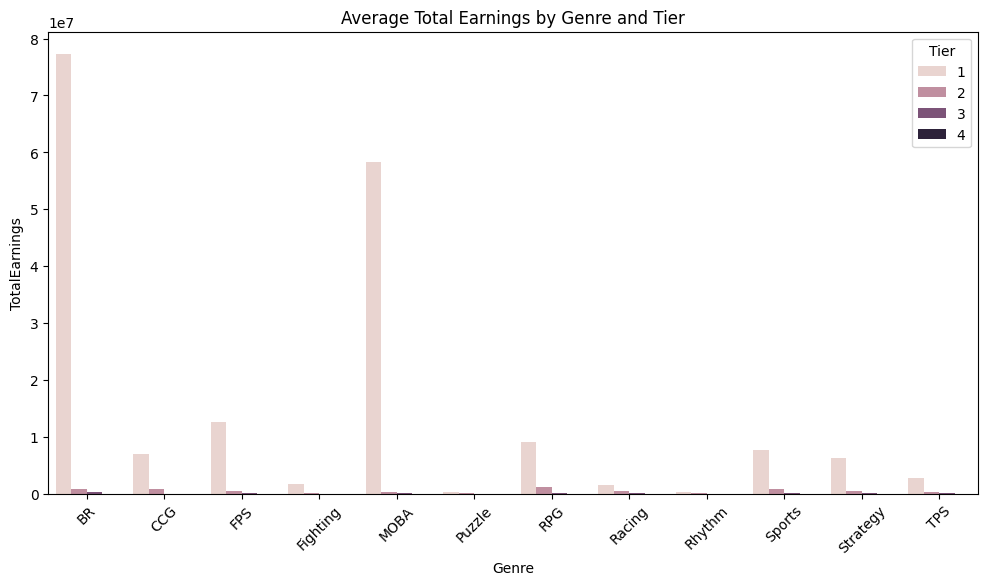

In [31]:
genre_tier_summary = (
    full_table.groupby(['Genre', 'Tier'])
      .agg({
          'TotalEarnings': 'mean',
          'TotalPlayers': 'mean',
          'TotalTournaments': 'mean'
      })
      .round(2)
)

plt.figure(figsize=(12, 6))
sb.barplot(
    data=genre_tier_summary,
    x='Genre',
    y='TotalEarnings',
    hue='Tier'
)
plt.title('Average Total Earnings by Genre and Tier')
plt.xticks(rotation=45)
plt.show()

Now, looking at the mean values for TotalEarnings by Tier, we can see that, despite how little amount of games there are in the BR and MOBA genres in eSports, they have the highest earnings by a huge margin. This shows that these genres most likely have a few games that are so popular that they can manage the financial support of vast amounts of winnings for their tournaments. Understandibly, FPS is third, considering it's sheer amount of games that are active in eSports.

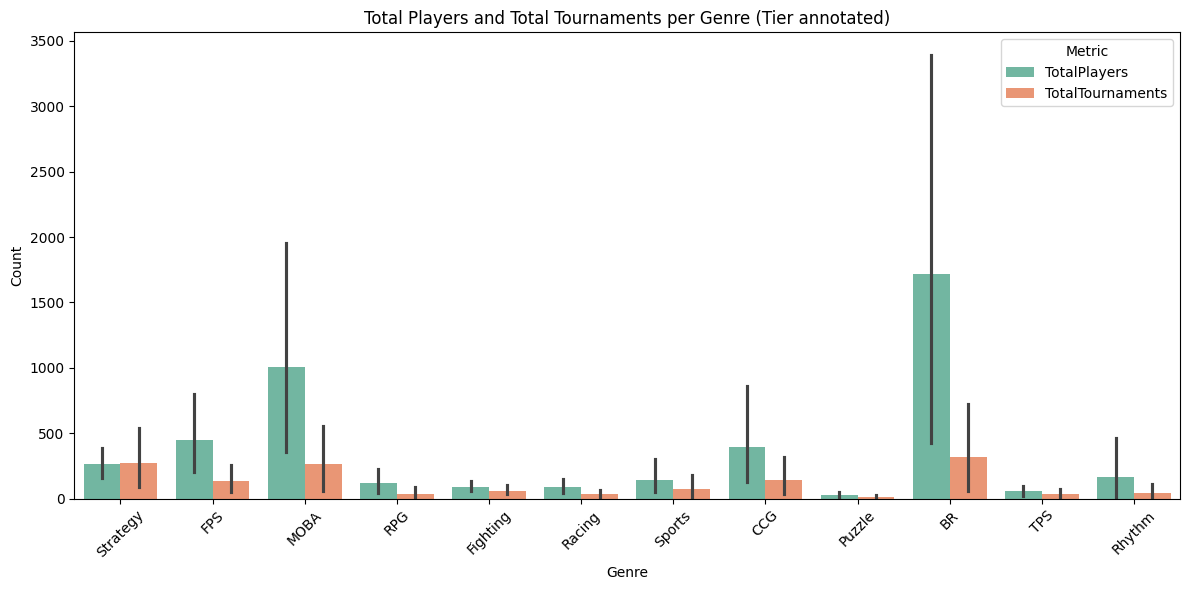

In [40]:
# Melt the dataframe so totalplayers and totaltournaments are in one column
full_table_melted = full_table.melt(
    id_vars=['Genre', 'Tier'],
    value_vars=['TotalPlayers', 'TotalTournaments'],
    var_name='Metric',
    value_name='Value'
)

plt.figure(figsize=(12, 6))
sb.barplot(
    data=full_table_melted,
    x='Genre',
    y='Value',
    hue='Metric', # totalplayers vs totaltournaments
    palette='Set2'
)

plt.title("Total Players and Total Tournaments per Genre (Tier annotated)")
plt.ylabel("Count")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


Again, this grouped bar plot shows how BR and MOBA genre games statistically are the most successful. Although Strategy seems to have about the same amount of tournaments as these two genres, no other genre shows the amount of players that have participated in BR and MOBA game tournaments. FPS remains third again.

## Conclusion

By the calculations and analyses that were done above, the conclusion that we made is that Battle Royale- and Massive Online Battle Arena-style video games statistically become the most successful in eSports, as they boast the most amount of earnings, players and tournaments. However, they both have very little amount of games that are actually active in the eSports scene, so it comes down to if the video game blows up in popularity will it actually see the amount of success that our data shows. A more sustainable but less successful genre seems to be First-Person Shooters, which consistently places high in comparisons in all metrics (total players, tournaments, average total earnings, and game count).

---

## References

Data sourced from: https://www.kaggle.com/datasets/rankirsh/esports-earnings/data

Libraries used:

- [Scikit-learn](https://scikit-learn.org/stable/index.html)
- [iPyKernel](https://pypi.org/project/ipykernel/)
- [Seaborn](https://seaborn.pydata.org/)
- [Matplotlib](https://matplotlib.org/)
- [NumPy](https://numpy.org/)
- [Pandas](https://pandas.pydata.org/)